In [ ]:
import pandas as pd

# Load data
df = pd.read_csv('./Mumbai_House_Rent.csv')
print(df.head())
print(df.info())
print(df.describe())


  Locality             Type  Rent/Month Build_up_area(sq.ft)      Furnishing  \
0  Andheri   1 RK Apartment       20000            350 sq.ft  Semi Furnished   
1  Andheri  3 BHK Apartment      100000           1850 sq.ft  Semi Furnished   
2  Andheri  2 BHK Apartment       45000           1240 sq.ft  Semi Furnished   
3  Andheri  1 BHK Apartment       31500            650 sq.ft     Unfurnished   
4  Andheri  2 BHK Apartment       44000           1250 sq.ft     Unfurnished   

  Bathrooms  Balcony  Parking Carpet_area(sq.ft)  
0         1  Missing      0.0          250 sq.ft  
1         3        1      2.0         1400 sq.ft  
2         2        4      1.0          850 sq.ft  
3         2  Missing      1.0          425 sq.ft  
4         2        3      1.0          800 sq.ft  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop rows with missing values
df = df.dropna()

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop('Rent/Month', axis=1)
y = df['Rent/Month']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
!pip install catboost


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("Mumbai_House_Rent.csv")

# Clean area columns
df['Carpet_area(sq.ft)'] = df['Carpet_area(sq.ft)'].replace('Missing', np.nan)
df['Carpet_area(sq.ft)'] = df['Carpet_area(sq.ft)'].str.replace(' sq.ft', '').astype(float)
df['Build_up_area(sq.ft)'] = df['Build_up_area(sq.ft)'].str.replace(' sq.ft', '').astype(float)

# Handle missing values
df['Balcony'] = pd.to_numeric(df['Balcony'].replace('Missing', np.nan))
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'].replace('Missing', np.nan))

# Drop rows with NaN values
df = df.dropna()

# Label encode categorical columns
label_encoders = {}
for col in ['Locality', 'Type', 'Furnishing']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature-target split
X = df.drop('Rent/Month', axis=1)
y = df['Rent/Month']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<ipython-input-1-bacf39976c77>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-1-bacf39976c77>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-1-bacf39976c77>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

📊 1. Distribution of Rent Prices

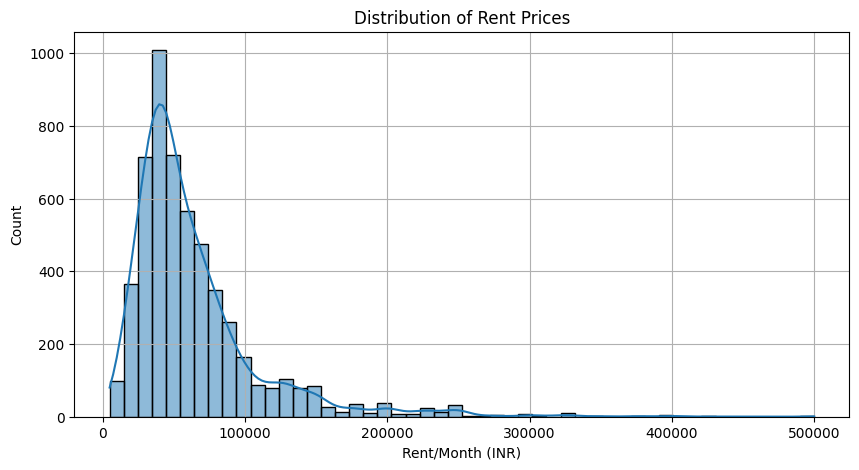

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['Rent/Month'], bins=50, kde=True)
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent/Month (INR)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


🏘️ 2. Average Rent by Locality (Top 10)


<ipython-input-4-b0ce64ab1e63>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_localities.values, y=top_localities.index, palette="viridis")


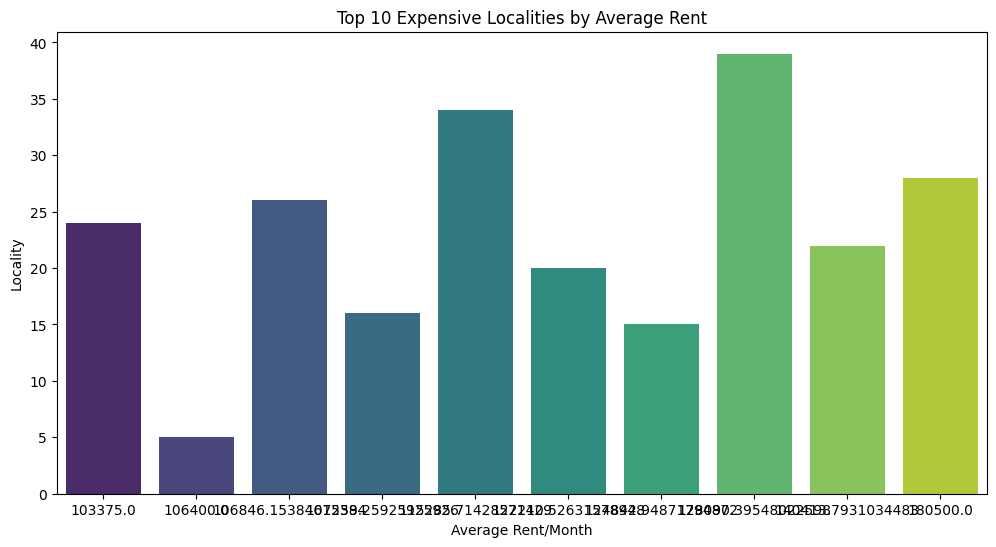

In [ ]:
top_localities = df.groupby('Locality')['Rent/Month'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_localities.values, y=top_localities.index, palette="viridis")
plt.title('Top 10 Expensive Localities by Average Rent')
plt.xlabel('Average Rent/Month')
plt.ylabel('Locality')
plt.show()


🛋️ 3. Furnishing Type vs Rent

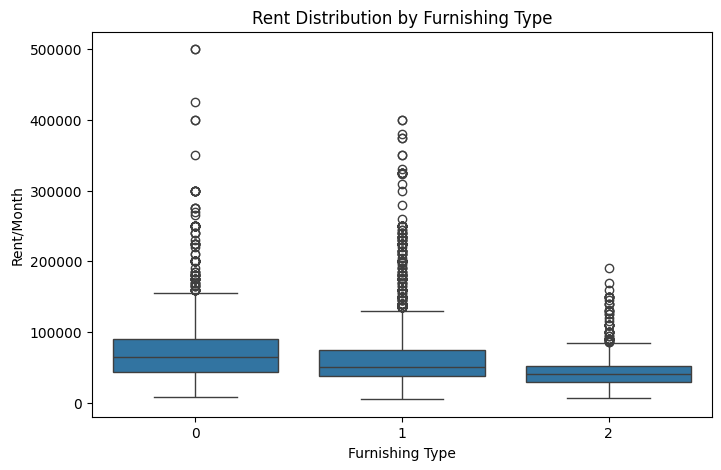

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Furnishing', y='Rent/Month', data=df)
plt.title('Rent Distribution by Furnishing Type')
plt.xlabel('Furnishing Type')
plt.ylabel('Rent/Month')
plt.show()


🚿 4. Bathrooms vs Rent

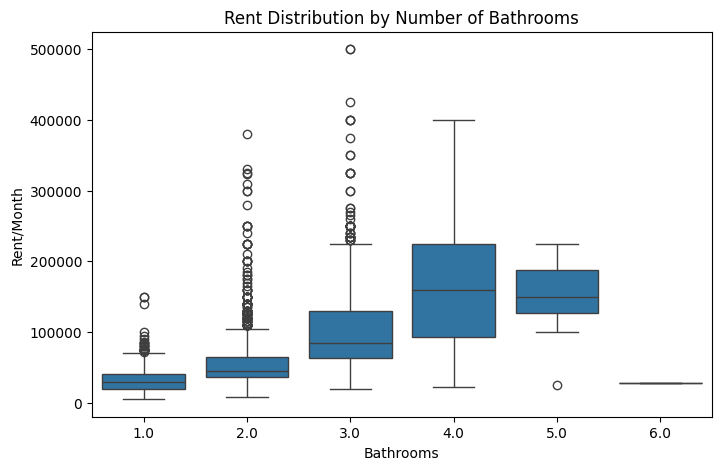

In [ ]:
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'].replace('Missing', None))
plt.figure(figsize=(8, 5))
sns.boxplot(x='Bathrooms', y='Rent/Month', data=df)
plt.title('Rent Distribution by Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Rent/Month')
plt.show()


📐 5. Correlation Heatmap After Preprocessing

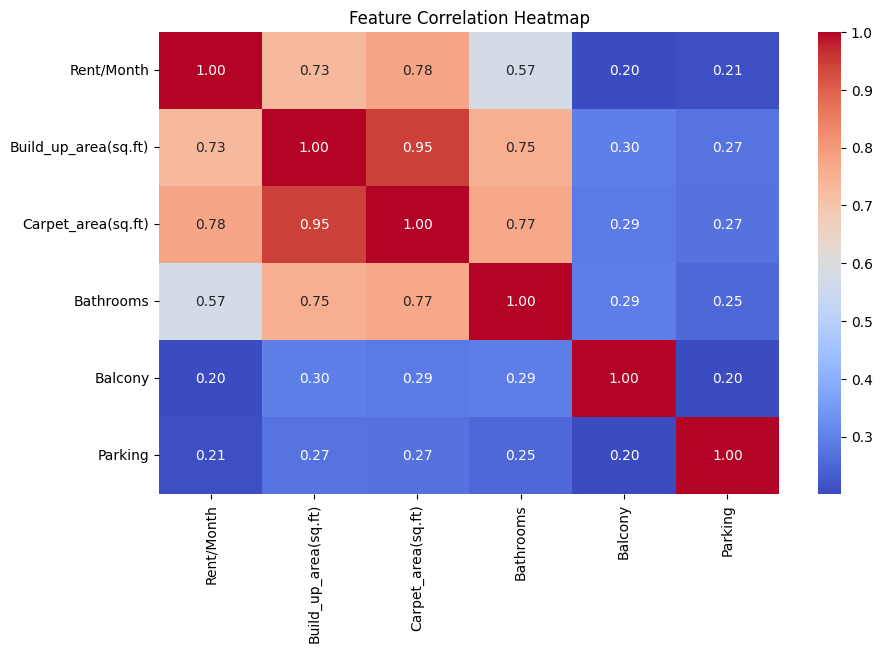

In [ ]:
# Create a copy
df_corr = df.copy()

# Clean Carpet_area
df_corr['Carpet_area(sq.ft)'] = df_corr['Carpet_area(sq.ft)'].replace('Missing', np.nan)
df_corr['Carpet_area(sq.ft)'] = df_corr['Carpet_area(sq.ft)'].astype(str).str.replace(' sq.ft', '')
df_corr['Carpet_area(sq.ft)'] = pd.to_numeric(df_corr['Carpet_area(sq.ft)'], errors='coerce')

# Clean Build_up_area
df_corr['Build_up_area(sq.ft)'] = df_corr['Build_up_area(sq.ft)'].astype(str).str.replace(' sq.ft', '')
df_corr['Build_up_area(sq.ft)'] = pd.to_numeric(df_corr['Build_up_area(sq.ft)'], errors='coerce')

# Convert missing values
df_corr['Bathrooms'] = pd.to_numeric(df_corr['Bathrooms'].replace('Missing', np.nan), errors='coerce')
df_corr['Balcony'] = pd.to_numeric(df_corr['Balcony'].replace('Missing', np.nan), errors='coerce')

# Drop rows with any missing values in numeric columns
numeric_df = df_corr[['Rent/Month', 'Build_up_area(sq.ft)', 'Carpet_area(sq.ft)', 'Bathrooms', 'Balcony', 'Parking']].dropna()

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


Mean Squared Error: 595153593.77
R² Score: 0.74


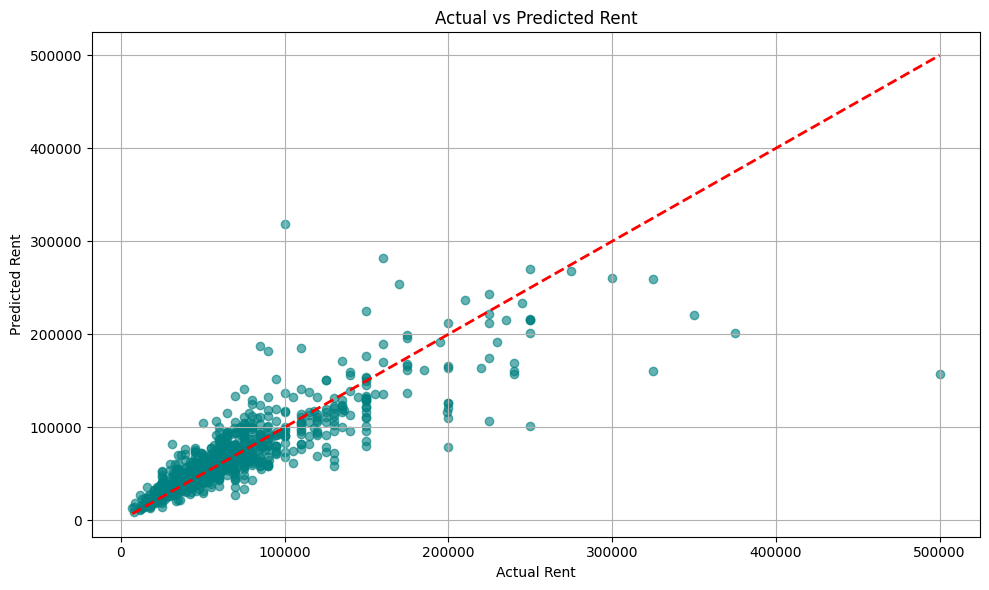

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Rent')
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Utility function to evaluate models
def evaluate_model(name, y_true, y_pred):
    print(f"🔍 {name}")
    print("  R² Score:", r2_score(y_true, y_pred))
    print("  MAE     :", mean_absolute_error(y_true, y_pred))
    print("  RMSE    :", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("")

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", y_test, lr.predict(X_test))

# 2. CatBoost
cat = CatBoostRegressor(verbose=0)
cat.fit(X_train, y_train)
evaluate_model("CatBoost Regressor", y_test, cat.predict(X_test))

# 3. XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
evaluate_model("XGBoost Regressor", y_test, xgb.predict(X_test))

# 4. Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
evaluate_model("Random Forest Regressor", y_test, rf.predict(X_test))

# 5. Support Vector Regression (uses scaled data)
svr = SVR()
svr.fit(X_train_scaled, y_train)
evaluate_model("Support Vector Regression", y_test, svr.predict(X_test_scaled))


🔍 Linear Regression
  R² Score: 0.6139434335839953
  MAE     : 18529.0570367529
  RMSE    : 29718.48053166222

🔍 CatBoost Regressor
  R² Score: 0.7599559412348738
  MAE     : 11823.829531437728
  RMSE    : 23434.009926457486

🔍 XGBoost Regressor
  R² Score: 0.7216343283653259
  MAE     : 12125.19921875
  RMSE    : 25235.330154368894

🔍 Random Forest Regressor
  R² Score: 0.7339362108131469
  MAE     : 12348.171044331464
  RMSE    : 24671.412507928075

🔍 Support Vector Regression
  R² Score: -0.08793374023672595
  MAE     : 29134.234904863788
  RMSE    : 49888.71889842591



In [ ]:
# Dictionary to store results
results = {}

def evaluate_and_store(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    results[name] = {"R2": r2, "MAE": mae, "RMSE": rmse}

# Evaluate all models and store metrics
evaluate_and_store("Linear Regression", y_test, lr.predict(X_test))
evaluate_and_store("CatBoost Regressor", y_test, cat.predict(X_test))
evaluate_and_store("XGBoost Regressor", y_test, xgb.predict(X_test))
evaluate_and_store("Random Forest Regressor", y_test, rf.predict(X_test))
evaluate_and_store("Support Vector Regression", y_test, svr.predict(X_test_scaled))

# Convert to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                                 R2           MAE          RMSE
Linear Regression          0.613943  18529.057037  29718.480532
CatBoost Regressor         0.759956  11823.829531  23434.009926
XGBoost Regressor          0.721634  12125.199219  25235.330154
Random Forest Regressor    0.733936  12348.171044  24671.412508
Support Vector Regression -0.087934  29134.234905  49888.718898


Important features plotting

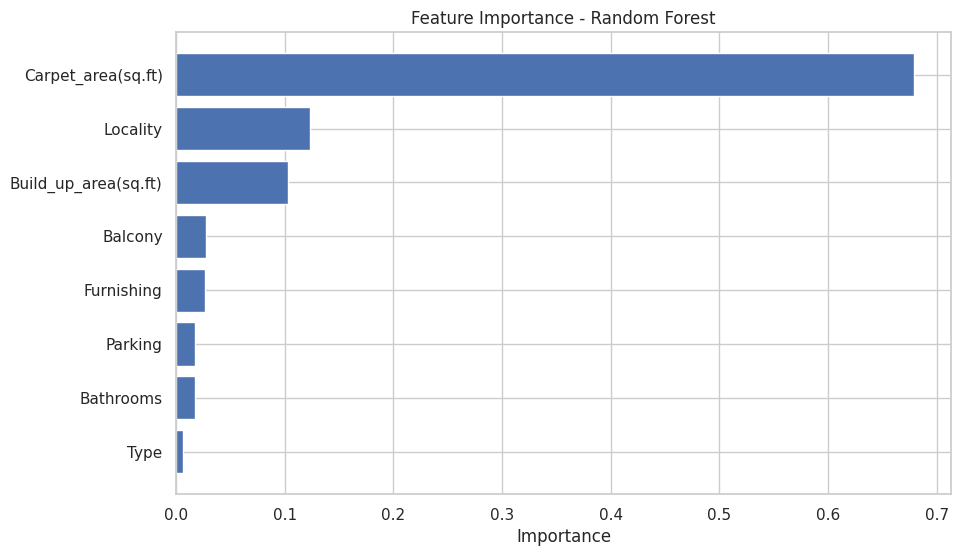

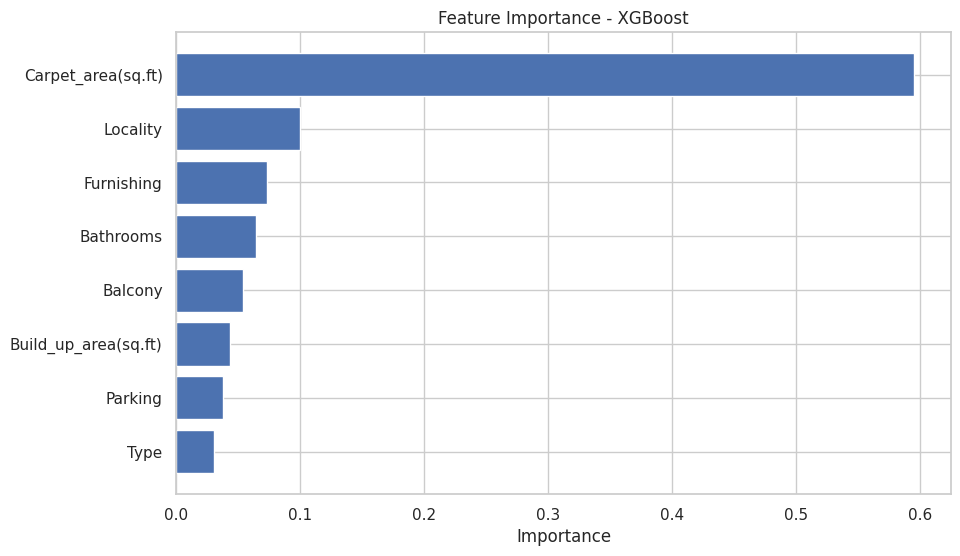

In [ ]:
import matplotlib.pyplot as plt

# Feature importance from Random Forest
feature_importances_rf = rf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
sorted_idx_rf = feature_importances_rf.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx_rf], feature_importances_rf[sorted_idx_rf])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.show()

# Feature importance from XGBoost
feature_importances_xgb = xgb.feature_importances_

# Sort feature importances in descending order
sorted_idx_xgb = feature_importances_xgb.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx_xgb], feature_importances_xgb[sorted_idx_xgb])
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.show()


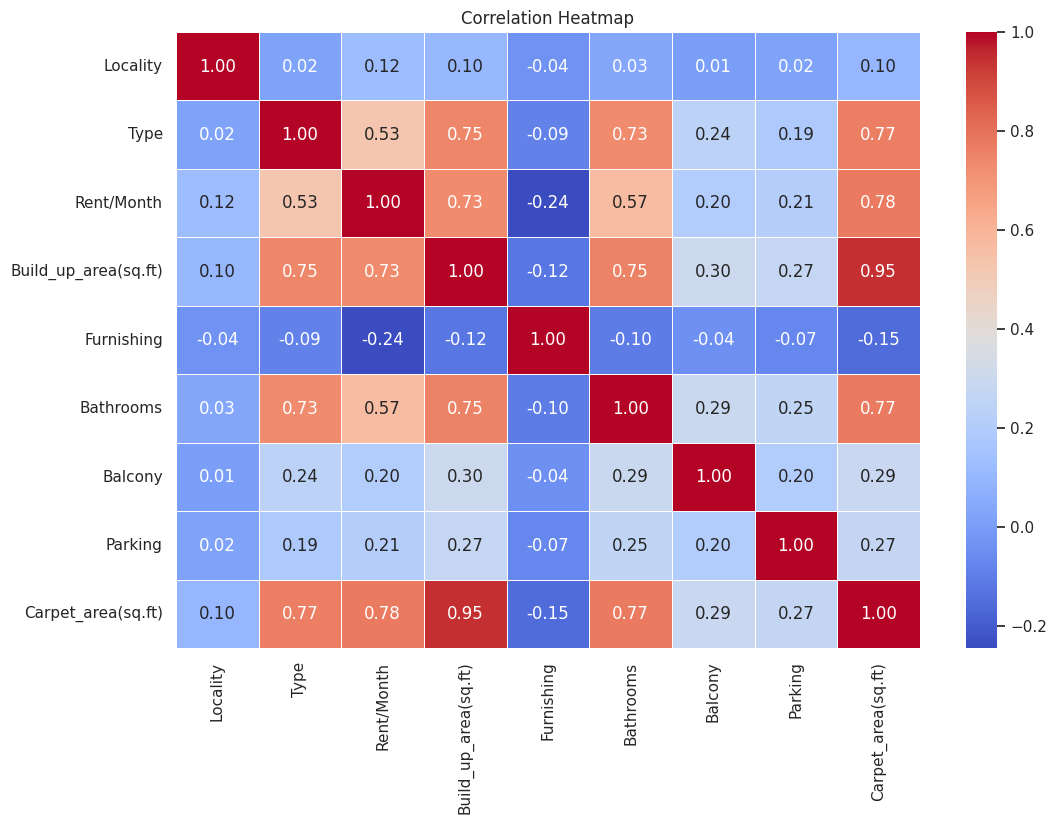

In [ ]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


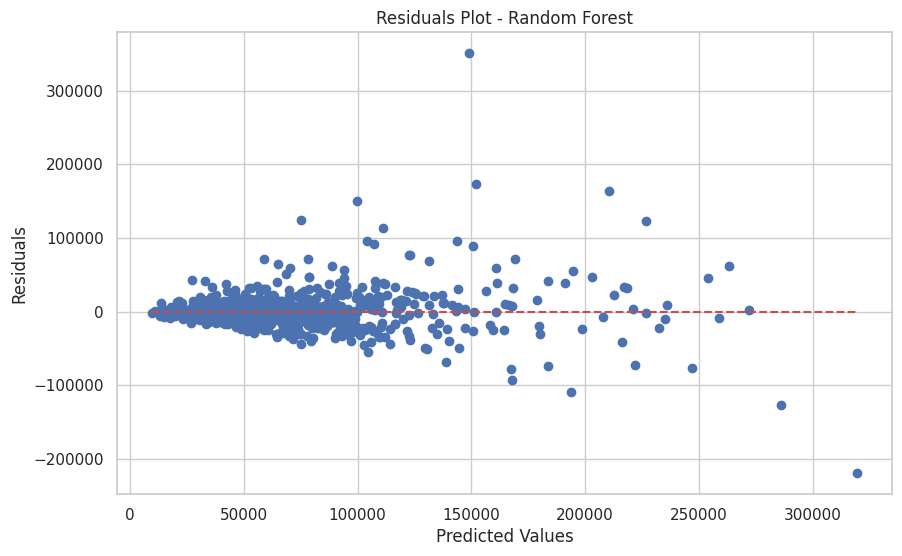

In [ ]:
# Residuals plot for Random Forest
y_pred_rf = rf.predict(X_test)
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals_rf)
plt.hlines(y=0, xmin=min(y_pred_rf), xmax=max(y_pred_rf), colors='r', linestyles='dashed')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot - Random Forest")
plt.show()


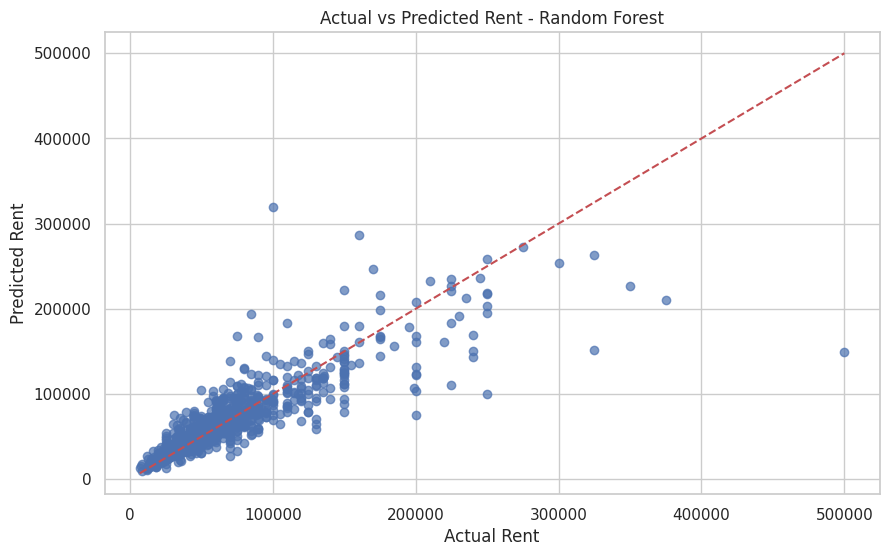

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent - Random Forest")
plt.show()


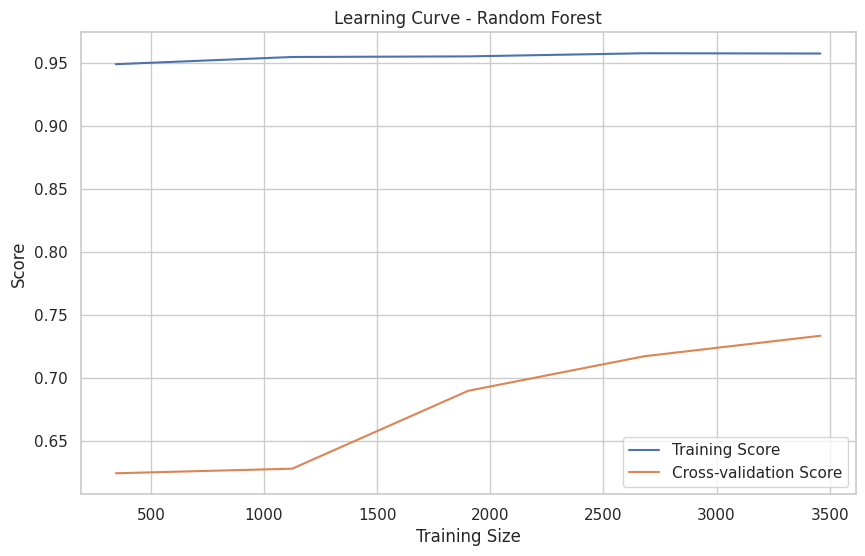

In [ ]:
from sklearn.model_selection import learning_curve

# Learning curve for Random Forest
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation Score")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.show()


ploting dones

<ipython-input-18-ac5762f31887>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R2", palette="viridis")


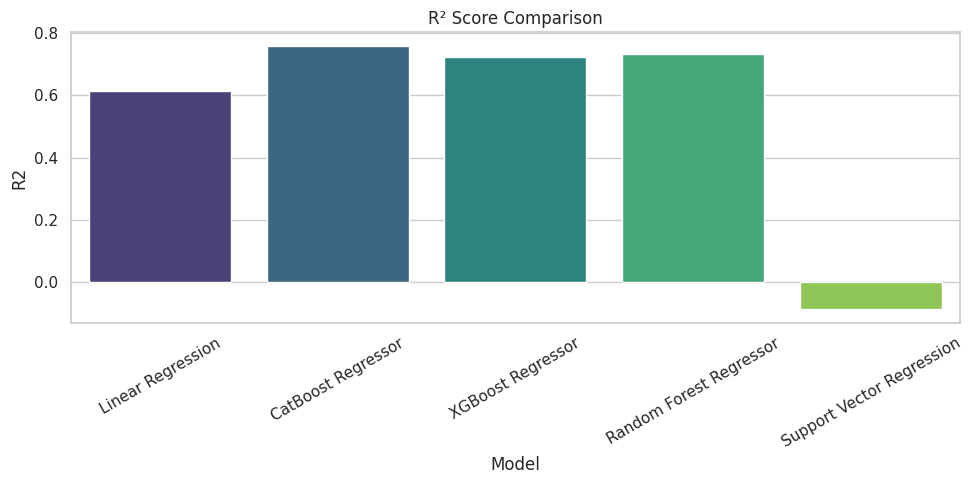

<ipython-input-18-ac5762f31887>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="MAE", palette="coolwarm")


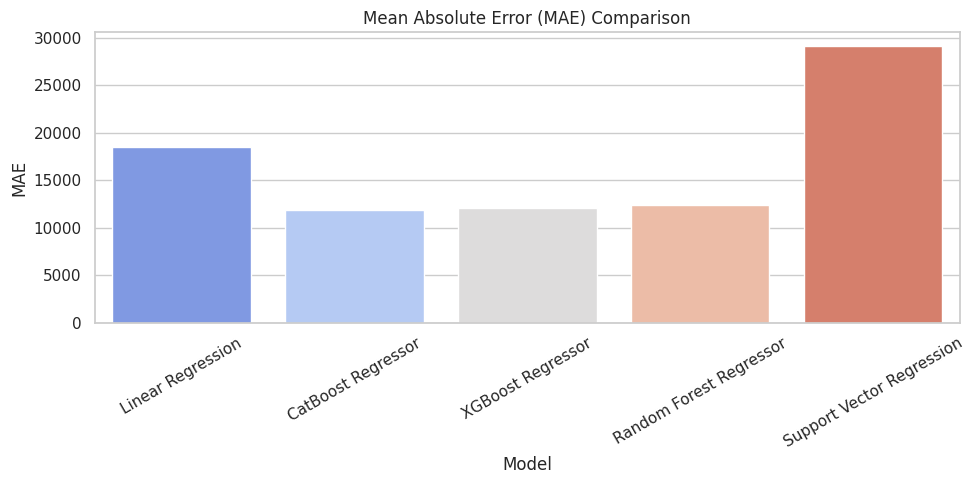

<ipython-input-18-ac5762f31887>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", palette="mako")


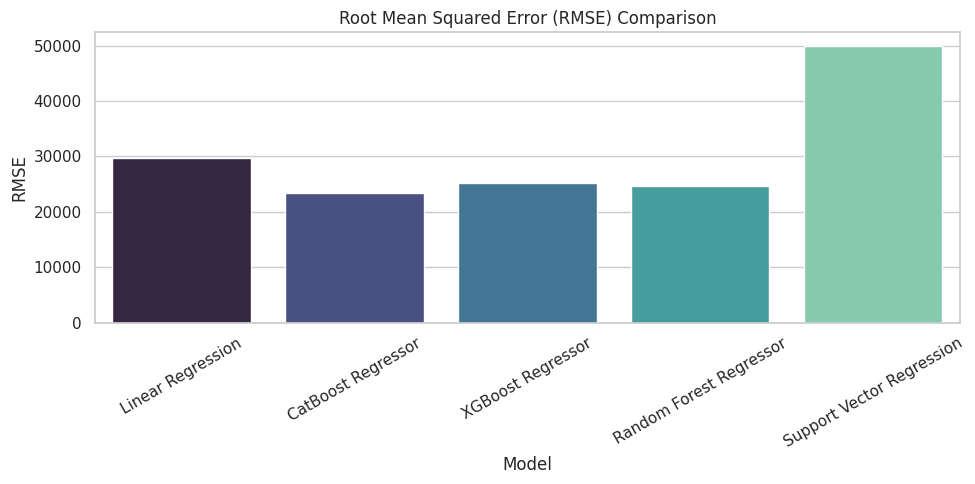

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
results_df.reset_index(inplace=True)
results_df.rename(columns={"index": "Model"}, inplace=True)

# Plot R2 Score
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R2", palette="viridis")
plt.title("R² Score Comparison")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="MAE", palette="coolwarm")
plt.title("Mean Absolute Error (MAE) Comparison")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="RMSE", palette="mako")
plt.title("Root Mean Squared Error (RMSE) Comparison")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
